In [18]:
# Imports
import scipy as sp
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [16]:
sns.set(style='darkgrid')

# **Linear Regression-I**

**A. Dataset Creation**

In [7]:
# i). Dataset Generation
def gen2d(n):
    # Mean and Standard Deviation
    mu, sigma = 0, 1
    # Generating Dimension-1 of X
    dim1 = np.random.normal(mu, sigma, n)
    # Generating Dimension-2 of X
    dim2 = np.random.normal(mu, sigma, n)
    # Stacking Them
    x = np.stack((dim1, dim2), axis=1)
    # Generating Y
    y = np.random.normal(mu, sigma, n)
    return x, y

# Generate Dataset
n = 1500
X, y = gen2d(n)

In [10]:
# ii). Create a train-test split of 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, )

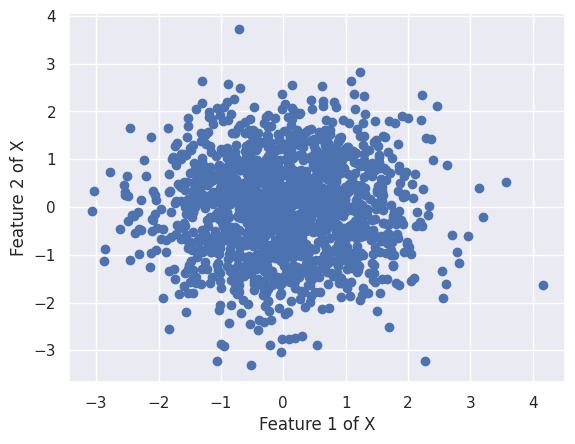

In [17]:
# iii). Plot Dim-1 and Dim-2 of X
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Feature 1 of X")
plt.ylabel("Feature 2 of X")
plt.show()

**B. Modelling**

In [32]:
# i. Scikit-Learn Library Linear Regression Model
linearReg = LinearRegression().fit(X_train, y_train)
p1 = list(linearReg.coef_)
p1.append(linearReg.intercept_)